In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv("../dataset/titanic_train.csv")
test = pd.read_csv("../dataset/titanic_test.csv")
datas = [train, test]
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
for data in datas:
    print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


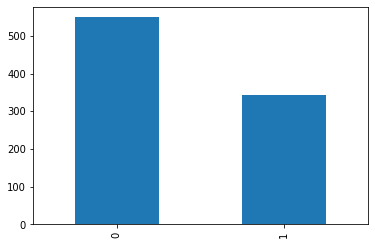

In [4]:
train['Survived'].value_counts().plot.bar()

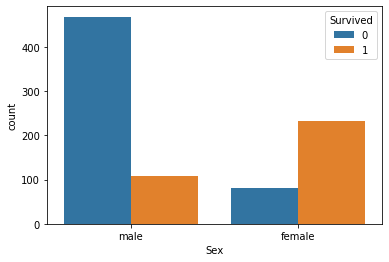

In [5]:
sns.countplot('Sex',hue='Survived',data=train)

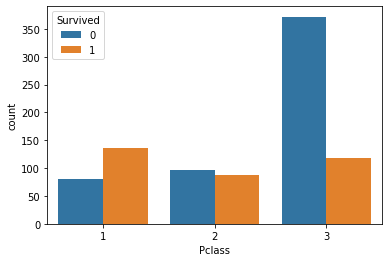

In [6]:
sns.countplot('Pclass',hue='Survived',data=train)

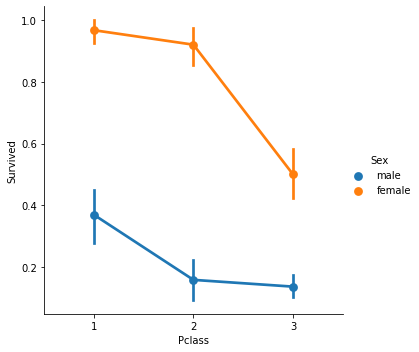

In [7]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train)

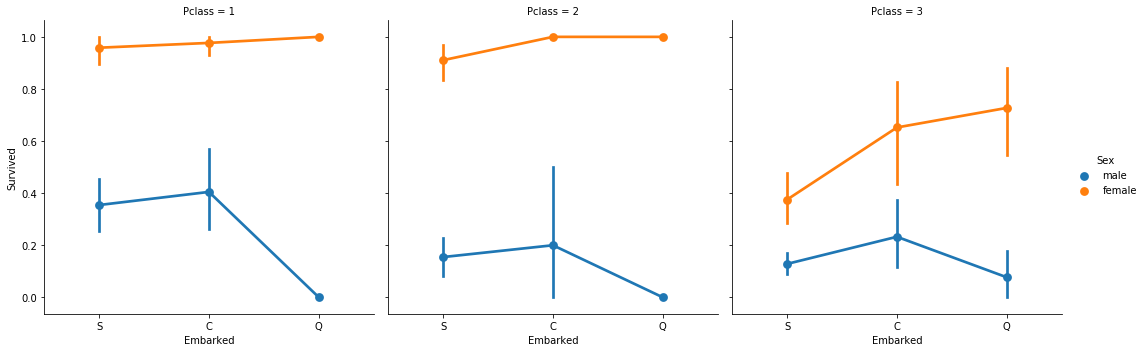

In [8]:
sns.factorplot('Embarked', 'Survived', hue='Sex', col='Pclass', data=train)

In [9]:
train = pd.read_csv("../dataset/titanic_train.csv")
test = pd.read_csv("../dataset/titanic_test.csv")

datas = [train, test]

In [10]:
for data in datas:
    data['Initial'] = 0
    data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.')

In [11]:
train['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [12]:
for data in datas:
    data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev',
                            'Capt','Sir','Don','Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other',
                            'Mr','Mr','Mr','Other'],inplace=True)

In [13]:
train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [14]:
for data in datas:
    data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Mr'), 'Age'] = 33
    data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Master'), 'Age'] = 5
    data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Mrs'), 'Age'] = 36
    data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Miss'), 'Age'] = 22
    data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Other'), 'Age'] = 46

In [15]:
print(datas[0]['Age'].isnull().sum())
print(datas[1]['Age'].isnull().sum())
print(datas[0]['Initial'].unique())
print(datas[1]['Initial'].unique())


0
0
['Mr' 'Mrs' 'Miss' 'Master' 'Other']
['Mr' 'Mrs' 'Miss' 'Master' 'Other']


In [16]:
for data in datas:
    data['Embarked'].fillna('S', inplace=True)

In [17]:
print(datas[0]['Embarked'].isnull().sum())
print(datas[1]['Embarked'].isnull().sum())

0
0


-inf

In [34]:
# Fare
for data in datas:
#     data['Fare'] = data['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
    data.loc[(data['Fare'].isnull()), 'Fare'] = 0

In [37]:
for data in datas:
    data['Age_band'] = 0
    data.loc[data['Age'] <= 16, 'Age_band'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band']=1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band']=2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band']=3
    data.loc[data['Age'] > 64, 'Age_band'] = 4

In [38]:
for data in datas:
    data['Family_size'] = 0
    data['Family_size'] = data['Parch'] + data['SibSp']
    data['Alone'] = 0
    data.loc[data['Family_size'] == 0, 'Alone'] = 1

In [39]:
for data in datas:
    data['Sex'].replace(['male','female'], [0,1], inplace=True)
    data['Embarked'].replace(['S','C','Q'], [0,1,2], inplace=True)
    data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'], [0,1,2,3,4], inplace=True)

In [40]:
for data in datas:
    data.drop(['Name','Age','Ticket','Cabin','PassengerId'], axis=1, inplace=True)

In [41]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Initial', 'Age_band', 'Family_size', 'Alone'],
      dtype='object')

In [42]:
test.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Initial',
       'Age_band', 'Family_size', 'Alone'],
      dtype='object')

In [43]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Initial,Age_band,Family_size,Alone
0,0,3,0,1,0,0.683603,0,0,1,1,0
1,1,1,1,1,0,1.450832,1,1,2,1,0
2,1,3,1,0,0,0.727559,0,2,1,0,1
3,1,1,1,1,0,1.379314,0,1,2,1,0
4,0,3,0,0,0,0.735091,0,0,2,0,1


## make model

In [44]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold


kfold = StratifiedKFold(n_splits=10)

In [45]:
X = train[train.columns[1:]]
Y = train['Survived']

In [ ]:
# rf = RandomForestClassifier()
# ## Grid Search
# rf_param_grid = {
#     "max_depth": [None],
#     "max_features": [1, 3, 10],
#     "min_samples_split": [2, 3, 10],
#     "min_samples_leaf": [1, 3, 10],
#     "bootstrap": [False],
#     "n_estimators": [100, 300, 500, 700, 800, 900]
# }
# rf_grid = GridSearchCV(rf, param_grid = rf_param_grid, scoring="accuracy", n_jobs=4, verbose=1)
# rf_grid.fit(X,Y)

In [ ]:
# rf_best = rf_grid.best_estimator_
# print(rf_grid.best_score_)
# print(rf_best)

In [ ]:
# gb = GradientBoostingClassifier()
# ## Grid Search
# gb_param_grid = {
#     "loss":["deviance"],
#     "n_estimators": [100, 300, 500,1000],
#     "learning_rate": [0.1, 0.05, 0.01],
#     "max_depth": [4, 8],
#     "max_features": [0.3, 0.1],
#     "min_samples_leaf": [100, 150, 200]
    
# }
# gb_grid = GridSearchCV(gb, param_grid = gb_param_grid, scoring="accuracy", n_jobs=4, verbose=1)
# gb_grid.fit(X,Y)
# gb_best = gb_grid.best_estimator_
# print(gb_grid.best_score_)
# print(gb_best)

In [46]:
svc = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [0.001, 0.01, 0.1, 0.5, 1],
                  'C': [0.01, 0.1, 1, 10, 50, 100, 200, 300]}
svc_grid = GridSearchCV(svc, param_grid=svc_param_grid, cv=kfold,scoring='accuracy', n_jobs=4, verbose=1)
svc_grid.fit(X, Y)
svc_best = svc_grid.best_estimator_
print(svc_grid.best_score_)
print(svc_grid.best_params_)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    8.2s


0.8305243445692885
{'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}


[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:   22.9s finished


In [47]:
vote = VotingClassifier(estimators=[('svc', svc_best)], voting='soft', n_jobs=4)
vote_result=vote.fit(X,Y)

In [48]:
pred = vote.predict(test)

In [ ]:
test

In [50]:
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,